In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import listdir

#get images
#sort into place and shutter speed
#pick a number
#for each pixel, chose the one closest to number

In [3]:
path = 'data_collection/data/850nm/Bastian'
shutter_speeds = []

def split(path):
    s = path.replace('.', '_')
    s = s.split('_')
    return s

image_names = listdir(path)
splits = list(map(split, image_names))

shutter_speeds = np.unique(np.array(splits)[:,1]).astype(int)
shutter_speeds = np.sort(shutter_speeds).astype(str)

In [4]:
all_images = []
for shutter_speed in shutter_speeds:
    names = [name for name in image_names if shutter_speed in name]
    names.sort()
    images = []
    for name in names:
        gray = cv2.cvtColor(cv2.imread(path + "/" + name), cv2.COLOR_BGR2GRAY)
        images.append(gray)
    all_images.append(images)
all_images = np.array(all_images)

In [48]:
median_images = []
for images in all_images:
    median = np.median(images, axis=0).astype('uint8')
    median_images.append(median)

In [75]:
shutter_combine_value = 180

combine_indices = np.array(median_images).astype('int16')
combine_indices = abs(combine_indices - shutter_combine_value)
combine_indices = np.argmin(combine_indices, axis=0)

In [76]:
combine_indices

array([[19, 19, 19, ...,  7,  6,  7],
       [19, 19, 19, ...,  7,  6,  7],
       [19, 19, 19, ...,  6,  7,  6],
       ...,
       [19, 19, 19, ..., 18, 19, 19],
       [19, 19, 19, ..., 18, 19, 19],
       [19, 19, 19, ..., 18, 19, 19]])

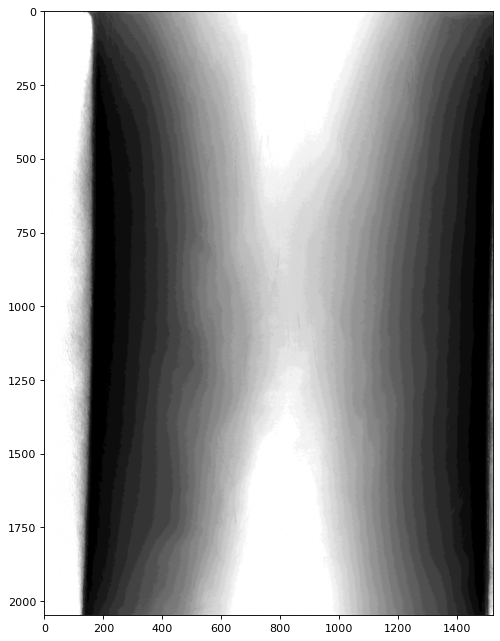

In [77]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(combine_indices, cmap='gray')

In [78]:
new_images = np.zeros(shape=(2048, 1520, 19))

In [79]:
for row in range(combine_indices.shape[0]):
    for col in range(combine_indices.shape[1]):
        index = combine_indices[row][col]
        pix_values = all_images[index,:,row,col]
        new_images[row][col] = pix_values

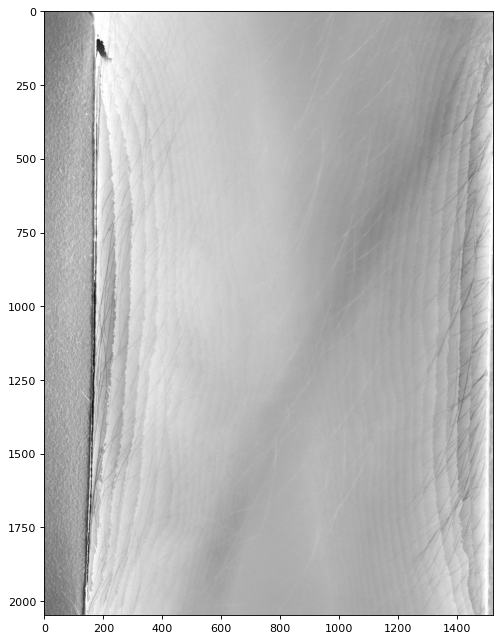

In [80]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(new_images[:,:,9], cmap='gray')

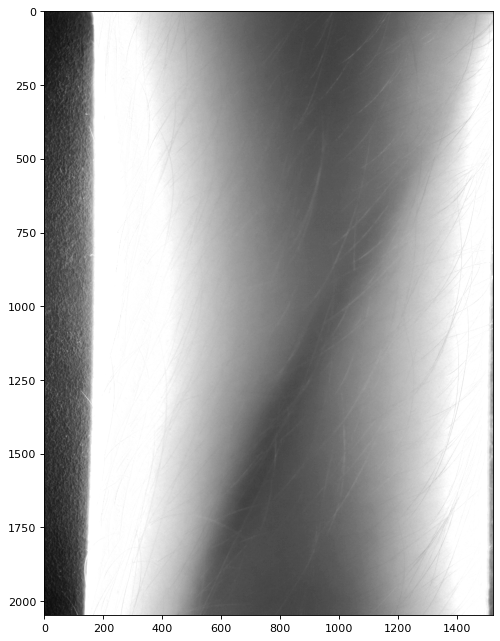

In [5]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(all_images[9][9], cmap='gray')